<a href="https://colab.research.google.com/github/sebasrosalesr/Sample-projects/blob/main/NLP_Model(part_I).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2024-07-31 15:53:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-31 15:53:11 (95.1 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



##Get the text data set

**From kaggle NLP getting started to classify tweets**

In [ ]:
#Get the text data set
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2024-07-31 15:55:02--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.180.207, 142.251.163.207, 142.251.167.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.180.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2024-07-31 15:55:02 (105 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
unzip_data("nlp_getting_started.zip")


##Visualize the data set

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df['text'][12]

"#raining #flooding #Florida #TampaBay #Tampa 18 or 19 days. I've lost count "

In [ ]:
#Shuffe training data frame
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# what does the test data look like
test_df.head() #no labeled

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# how many examples of each class
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [ ]:
#let's visualice the total samples of training and test sets
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
#let's visualice some random examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
#WorldNews
 Fears over missing migrants in Med - BBC News - Home:
Rescuers search for survivors after a boat carr.. http://t.co/iJoBZ3MZp0

---

Target: 1 (real disaster)
Text:
Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disease in Edinburgh are to ...

---

Target: 0 (not real disaster)
Text:
@TwopTwips make natural disaster reporting more interesting by adding 'The' to headlines such as 'Rescuers are sifting through the wreckage'

---

Target: 1 (real disaster)
Text:
Japan marks 70th anniversary of Hiroshima atomic bombing #Generalnews http://t.co/M9o08GUrT4

---

Target: 1 (real disaster)
Text:
Schools in Western Uganda still Burning down Buildings during Strikes....Strikes in Western Uganda always Lit literally..

---



## Split training data between validation and training set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, #10% of the validation set
                                                                            random_state=42)

In [ ]:
#check the lenghts
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
#check the 10 first samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

### Tokenization vs Embedding

**Tokenization**:
- **Purpose**: Breaks text into smaller units called tokens.
- **Types**:
  - *Word Tokenization*: Splits text into words. E.g., "I love NLP." → ["I", "love", "NLP", "."]
  - *Subword Tokenization*: Splits text into meaningful subwords. E.g., "unhappiness" → ["un", "happiness"]
  - *Character Tokenization*: Splits text into characters. E.g., "hello" → ["h", "e", "l", "l", "o"]
- **Stage**: Early stage in NLP pipeline, directly processes raw text.
- **Output**: Sequence of tokens (words, subwords, or characters).

**Embedding**:
- **Purpose**: Converts tokens into dense vector representations capturing semantic meaning.
- **Types**:
  - *One-Hot Encoding*: Binary vector representation. E.g., "love" → [0, 1, 0]
  - *Word Embeddings*: Dense vectors capturing semantic relationships. E.g., Word2Vec, GloVe.
  - *Contextual Embeddings*: Dynamic vectors based on context. E.g., BERT, GPT-3.
- **Stage**: Later stage in NLP pipeline, converts tokens into numerical vectors.
- **Output**: Dense numerical vectors representing tokens.

In [ ]:
#converting text into numbers
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=10000, #how many words in the vocabulary (automatically add <OOV>)
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, #create groups of n words
                                    output_mode="int",  #how to map tokens into numbers
                                    output_sequence_length=None, #how long do you want your sequence to be
                                    pad_to_max_tokens=True)

In [ ]:
len(train_sentences[0].split())

7

In [ ]:
#find the average numbers of tokens words in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))


15

In [ ]:
#set up text vectorization variables
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
#fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
#create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
#choose a random sentence and see it tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Suicide of a Superpower : Will America Survive To 2025? by Patrick J. Buchana... http://t.co/eMTwirknyq http://t.co/M9K08OaZve

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  87,    6,    3, 7918,   38,  826,  310,    5,    1,   18, 2358,
        3730,    1,    1,    1]])>

In [ ]:
#get the unique words
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
lowest_5_words = words_in_vocab[-5:]

In [ ]:
top_5_words[:5], lowest_5_words[:5], print(len(words_in_vocab))

10000


(['', '[UNK]', 'the', 'a', 'in'],
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1'],
 None)

## Creating an embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)
embedding

In [ ]:
#get a random sentence
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n\nEmbedded version:")

#embed the random sentence
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
@KurtSchlichter  He's already done it by negotiating with the #1 state of terrorism in the World. What was his hurry in trying to get a deal

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04326518,  0.01787626,  0.03302084, ..., -0.01720398,
         -0.02589869, -0.00821906],
        [ 0.00658432,  0.00010053, -0.03969166, ..., -0.00646775,
          0.01862205,  0.01552689],
        [-0.03515279, -0.04694187, -0.03153648, ...,  0.01518403,
          0.02658004,  0.02157067],
        ...,
        [-0.04769995, -0.02507515, -0.02386448, ...,  0.02172093,
         -0.04622499, -0.00304736],
        [-0.03901508,  0.02319742, -0.0175446 , ..., -0.03063275,
         -0.02544444,  0.02519387],
        [ 0.00948478, -0.03510808,  0.01816637, ..., -0.00342945,
          0.02329287, -0.03937925]]], dtype=float32)>

In [ ]:
#checking a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 4.32651751e-02,  1.78762563e-02,  3.30208428e-02,  1.94616951e-02,
        -3.71435657e-02, -1.69269443e-02, -2.12246068e-02, -2.34715827e-02,
        -2.90835146e-02,  8.25244188e-03, -2.94863340e-02,  2.12283246e-02,
         1.31131075e-02, -2.57572066e-02,  4.89257835e-02,  2.52663828e-02,
         2.81581618e-02,  3.93622778e-02,  1.29797943e-02, -1.63096674e-02,
         1.78224333e-02,  1.48051493e-02, -4.47671190e-02, -2.82418616e-02,
         3.25595774e-02, -2.75988467e-02, -3.75743024e-02,  3.64804380e-02,
         1.43535435e-05,  1.74350999e-02,  2.03179456e-02, -4.73536178e-03,
        -7.28682429e-03, -1.92672852e-02,  4.89290468e-02, -2.14827415e-02,
        -4.48262207e-02,  2.39608437e-03, -1.04663260e-02, -2.35759094e-03,
        -1.07003935e-02,  5.68072870e-03, -7.02972338e-03,  5.85503504e-03,
         3.42092253e-02,  4.52996604e-02,  3.71986516e-02, -2.73051746e-02,
        -2.11072564e-02, -4.14608829e-0

## Create a Base Line(model_0) model TF-IDF from scikitlearn

In [ ]:
#Model0 getting the base line
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), #convert words to numbers
                    ("clf", MultinomialNB()) #model to text
])

#fit the pipe line to training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
#evaluate the model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
#make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
train_labels[:20]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

## Create a evluation function with different metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  """
  #calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  #calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  return {
      "accuracy": model_accuracy,
      "precision": model_precision,
      "recall": model_recall,
      "f1": model_f1
  }

In [ ]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Deep learning Model (Model_1)

simple dense model


In [ ]:
from helper_functions import create_tensorboard_callback

#create a tensorboard callback
SAVE_DIR = "model_logs"

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Dense(10, activation="tanh")(x)
x = layers.Dense(5, activation="tanh")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 dense_9 (Dense)             (None, 15, 10)            1290      
                                                                 
 dense_10 (Dense)            (None, 15, 5)             55        
                                                                 
 global_average_pooling1d_5  (None, 5)                 0         
  (GlobalAveragePooling1D)                           

In [ ]:
#compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
#fit the model
model_1_history = model_1.fit(x = train_sentences,
                            y = train_labels,
                            epochs=5,
                            validation_data=(val_sentences, val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR, "model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20240731-225517
Epoch 1/5
215/215 [==============================] - 3s 10ms/step - loss: 0.4864 - accuracy: 0.8707 - val_loss: 0.5227 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3862 - accuracy: 0.8780 - val_loss: 0.4988 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3431 - accuracy: 0.8886 - val_loss: 0.4895 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3128 - accuracy: 0.9013 - val_loss: 0.4885 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2900 - accuracy: 0.9085 - val_loss: 0.4889 - val_accuracy: 0.7743


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.7743


[0.48886796832084656, 0.7742782235145569]

In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[0]

24/24 [==============================] - 0s 2ms/step


array([0.29128596], dtype=float32)

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 77.42782152230971,
 'precision': 0.782466266919887,
 'recall': 0.7742782152230971,
 'f1': 0.769750137241332}

In [ ]:
embedded_weights = model_1.get_layer("embedding").get_weights()[0]

In [ ]:
embedded_weights.shape

(10000, 128)

In [ ]:
embedded_weights

array([[ 0.01493303,  0.00826235, -0.03137038, ..., -0.01644892,
         0.00447356,  0.02815009],
       [-0.00503336,  0.03067836,  0.01040638, ...,  0.02512494,
         0.01997072,  0.04419992],
       [ 0.00904736, -0.00761205, -0.02730022, ...,  0.01572685,
         0.02366192, -0.04908259],
       ...,
       [ 0.02589763, -0.01781245,  0.03536363, ...,  0.03095522,
        -0.0022406 ,  0.0251863 ],
       [ 0.00244238,  0.0436638 , -0.19025949, ...,  0.1404422 ,
         0.09844252, -0.2078627 ],
       [ 0.24771899,  0.17380057, -0.28684527, ...,  0.2634979 ,
         0.24169473, -0.2810532 ]], dtype=float32)

**Write the weights to disk. To use the Embedding Projector, you will upload two files in tab separated format: a file of vectors (containing the embedding), and a file of meta data (containing the words).**

https://projector.tensorflow.org/?_gl=1*1ur1s5z*_ga*MTAzODI3ODI5My4xNzIyMzYyNDI0*_ga_W0YLR4190T*MTcyMjQ2Njc4Ni4yLjEuMTcyMjQ2Njc4Ny4wLjAuMA..

In [ ]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embedded_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Rcurrent Neural Network (RNN's) Model

LSTM's = Long short term memory

In [ ]:
#Create a LSTM model
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")

x = text_vectorizer(inputs)

x = embedding(x)

x = layers.LSTM(64)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")


In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm_23 (LSTM)              (None, 64)                49408     
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20240731-233705
Epoch 1/5
215/215 [==============================] - 7s 21ms/step - loss: 0.1040 - accuracy: 0.9675 - val_loss: 1.0098 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0449 - accuracy: 0.9801 - val_loss: 1.1497 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0404 - accuracy: 0.9828 - val_loss: 1.2557 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 4s 16ms/step - loss: 0.0342 - accuracy: 0.9832 - val_loss: 1.4288 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 4s 16ms/step - loss: 0.0353 - accuracy: 0.9845 - val_loss: 1.5259 - val_accuracy: 0.7520


In [ ]:
#Evaluate the model
model_2.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 1.5259 - accuracy: 0.7520


[1.5258506536483765, 0.751968502998352]

In [ ]:
#make predictions
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:5]

24/24 [==============================] - 1s 4ms/step


array([[1.4030495e-02],
       [7.0004660e-01],
       [9.9982947e-01],
       [4.1640714e-02],
       [1.7066713e-04]], dtype=float32)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [ ]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 75.19685039370079,
 'precision': 0.7522686474209189,
 'recall': 0.7519685039370079,
 'f1': 0.7503102758782113}

## MODEL_3: GRU's model

In [ ]:
#Create a RNN using GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.LSTM(100, return_sequences=True)(x)
x = layers.GRU(100)(x)
x = layers.Dense(64, activation="relu")(x)
outputs= layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")


In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru_5 (GRU)                 (None, 15, 64)            37248     
                                                                 
 lstm_26 (LSTM)              (None, 15, 100)           66000     
                                                                 
 gru_6 (GRU)                 (None, 100)               60600     
                                                       

In [ ]:
model_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model_3.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR, "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20240731-235147
Epoch 1/5
215/215 [==============================] - 13s 38ms/step - loss: 0.0882 - accuracy: 0.9680 - val_loss: 1.0783 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 7s 32ms/step - loss: 0.0449 - accuracy: 0.9791 - val_loss: 1.6206 - val_accuracy: 0.7546
Epoch 3/5
215/215 [==============================] - 7s 32ms/step - loss: 0.0412 - accuracy: 0.9813 - val_loss: 1.7206 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 7s 32ms/step - loss: 0.0356 - accuracy: 0.9823 - val_loss: 1.7704 - val_accuracy: 0.7441
Epoch 5/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0412 - accuracy: 0.9820 - val_loss: 1.7114 - val_accuracy: 0.7559


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:5]

24/24 [==============================] - 1s 8ms/step


array([[4.6249412e-02],
       [7.6488197e-01],
       [9.9989009e-01],
       [2.2978114e-01],
       [1.1918009e-05]], dtype=float32)

In [ ]:
# convert it to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [ ]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 75.59055118110236,
 'precision': 0.7576195817168306,
 'recall': 0.7559055118110236,
 'f1': 0.7534094293277974}

### MODEL 4: Bi-directional RNN model

In [ ]:
#Build a RNN Bi directional model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_26 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=[val_sentences, val_labels],
            callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20240801-000713
Epoch 1/5
215/215 [==============================] - 8s 20ms/step - loss: 0.0843 - accuracy: 0.9712 - val_loss: 1.0020 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0364 - accuracy: 0.9825 - val_loss: 1.3307 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0346 - accuracy: 0.9835 - val_loss: 1.4294 - val_accuracy: 0.7493
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0315 - accuracy: 0.9839 - val_loss: 1.6831 - val_accuracy: 0.7520
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0336 - accuracy: 0.9837 - val_loss: 1.2479 - val_accuracy: 0.7415


In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:5]

24/24 [==============================] - 1s 4ms/step


array([[1.3071026e-01],
       [9.0103668e-01],
       [9.9887514e-01],
       [3.7107080e-01],
       [7.9773978e-05]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(y_true=val_labels,
                 y_pred=model_4_preds)

In [ ]:
model_1_results

{'accuracy': 77.42782152230971,
 'precision': 0.782466266919887,
 'recall': 0.7742782152230971,
 'f1': 0.769750137241332}

In [ ]:
model_3_results

{'accuracy': 75.59055118110236,
 'precision': 0.7576195817168306,
 'recall': 0.7559055118110236,
 'f1': 0.7534094293277974}

## MODEL_5: Conv1D

In [ ]:
#create the Conv1D model
inputs = tf.keras.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

In [ ]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_27 (Dense)            (None, 1)              

In [ ]:
#compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_5.fit(train_sentences,
            train_labels,
            epochs = 5,
            validation_data = (val_sentences, val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR, "model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20240801-002510
Epoch 1/5
215/215 [==============================] - 4s 12ms/step - loss: 0.0953 - accuracy: 0.9667 - val_loss: 1.0025 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0607 - accuracy: 0.9772 - val_loss: 1.1427 - val_accuracy: 0.7546
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0505 - accuracy: 0.9785 - val_loss: 1.2811 - val_accuracy: 0.7493
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0455 - accuracy: 0.9812 - val_loss: 1.3158 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0449 - accuracy: 0.9807 - val_loss: 1.3984 - val_accuracy: 0.7520


In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:5]

24/24 [==============================] - 0s 2ms/step


array([[4.9563330e-01],
       [9.1407204e-01],
       [9.9990726e-01],
       [9.9971414e-02],
       [1.0398118e-07]], dtype=float32)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(y_true=val_labels,
                                  y_pred=model_5_preds)
model_5_results

{'accuracy': 75.19685039370079,
 'precision': 0.7518863114144899,
 'recall': 0.7519685039370079,
 'f1': 0.7506628579092585}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Pre trained Model_6 (USE* Feature extractor)

*USE=Universal Sentence Encoder*

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you can the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [ ]:
embed_samples.shape

TensorShape([2, 512])

In [ ]:
sentence_encode_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                       input_shape=[],
                                       dtype=tf.string,
                                       trainable=False,
                                       name="USE")

In [ ]:
#create a model
model_6 = tf.keras.Sequential([
                             sentence_encode_layer,
                             layers.Dense(64, activation="relu"),
                             layers.Dense(1, activation="sigmoid")
], name="model_6_USE")


#compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_28 (Dense)            (None, 64)                32832     
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_6_USE")])

Saving TensorBoard log files to: model_logs/model_6_USE/20240801-003752
Epoch 1/5
215/215 [==============================] - 5s 9ms/step - loss: 0.5052 - accuracy: 0.7777 - val_loss: 0.4461 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.4143 - accuracy: 0.8156 - val_loss: 0.4359 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.4009 - accuracy: 0.8203 - val_loss: 0.4346 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3940 - accuracy: 0.8256 - val_loss: 0.4292 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3864 - accuracy: 0.8307 - val_loss: 0.4286 - val_accuracy: 0.8150


In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:5]

24/24 [==============================] - 1s 7ms/step


array([[0.19693974],
       [0.7376281 ],
       [0.98701763],
       [0.19455796],
       [0.7405912 ]], dtype=float32)

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 1.], dtype=float32)>

In [ ]:
result_model_6 =calculate_results(y_true=val_labels,
                 y_pred=model_6_preds)

In [ ]:
len(train_sentences)

6851

## Model_7 but using 10% of the Data

**Transferring learning** works great with less trainable data

In [ ]:
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_sentences_10_percent), len(train_labes_10_percent)

(685, 685)

In [ ]:
pd.Series(train_labes_10_percent).value_counts()

,count
0,406
1,279


In [ ]:
#Create a subset of 10% of the data
#train_10_percent = train_df_shuffled[['text','target']].sample(frac=0.1, random_state=42)
#Train 10% percent.head()
#train_sentences_10_percent = train_10_percent['text'].to_list()
#train_labels_10_percent = train_10_percent['target'].to_list()
#len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [ ]:
train_10_percent['target'].value_counts()

,count
target,
0,413
1,348


In [ ]:
train_df_shuffled['target'].value_counts() #keep the proportion of target labels of the df shuffled data set

,count
target,
0,4342
1,3271


In [ ]:
#let's clone model 7
model_7 = tf.keras.models.clone_model(model_6)

In [ ]:
#compile
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_model_7 = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_7_USE_10_percent")])

Saving TensorBoard log files to: model_logs/model_7_USE_10_percent/20240801-011417
Epoch 1/5
22/22 [==============================] - 3s 37ms/step - loss: 0.6693 - accuracy: 0.7168 - val_loss: 0.6470 - val_accuracy: 0.7467
Epoch 2/5
22/22 [==============================] - 0s 16ms/step - loss: 0.6010 - accuracy: 0.8131 - val_loss: 0.5905 - val_accuracy: 0.7598
Epoch 3/5
22/22 [==============================] - 0s 16ms/step - loss: 0.5258 - accuracy: 0.8190 - val_loss: 0.5358 - val_accuracy: 0.7730
Epoch 4/5
22/22 [==============================] - 0s 17ms/step - loss: 0.4645 - accuracy: 0.8190 - val_loss: 0.5069 - val_accuracy: 0.7703
Epoch 5/5
22/22 [==============================] - 0s 14ms/step - loss: 0.4237 - accuracy: 0.8307 - val_loss: 0.4910 - val_accuracy: 0.7677


In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:5]

24/24 [==============================] - 0s 6ms/step


array([[0.22436924],
       [0.58448386],
       [0.91756284],
       [0.36045375],
       [0.5188017 ]], dtype=float32)

In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 1.], dtype=float32)>

##to avoid data leakage:

do not split data after, try small data sets split but do not use full data then split.

In [ ]:
model_7_results = calculate_results(y_true=val_labels,
                 y_pred=model_7_preds)

In [ ]:
result_model_6

{'accuracy': 81.49606299212599,
 'precision': 0.8155819225654458,
 'recall': 0.8149606299212598,
 'f1': 0.8140688060585699}

In [ ]:
#compare all model resutls
all_model_results = pd.DataFrame({'0 Baseline model':baseline_results,
                                  '1 Simple Dense':model_1_results,
                                  '2 LSTM':model_2_results,
                                  '3 GRUs':model_3_results,
                                  '4 Bi-directional':model_4_results,
                                  '5 Conv1D':model_5_results,
                                  '6 Tf HUB model':result_model_6,
                                  '7 tf HUB 10%':model_7_results})

In [ ]:
all_model_results = all_model_results.transpose()

In [ ]:
all_model_results['accuracy'] = all_model_results['accuracy']/100


<Axes: >

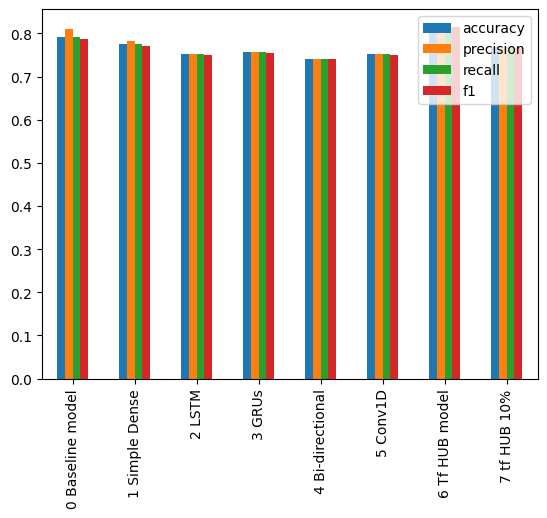

In [ ]:
all_model_results.plot(kind='bar')

In [ ]:
model_6.save("model_6_USE")

In [ ]:
model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 6ms/step - loss: 0.4286 - accuracy: 0.8150


[0.4285760223865509, 0.8149606585502625]

In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)

24/24 [==============================] - 0s 6ms/step


In [ ]:
model_6_pretrained = tf.squeeze(tf.round(model_6_pred_probs))

In [ ]:
model_6_pretrained[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
#Creat a data frame
val_df = pd.DataFrame({"text":val_sentences,
                                "target":val_labels,
                                "pred":model_6_pretrained,
                       'pred_probs':tf.squeeze(model_6_pred_probs)})

In [ ]:
val_df.head()

,text,target,pred,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.196940
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.737628
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.987018
3,@camilacabello97 Internally and externally scr...,1,0.0,0.194558
4,Radiation emergency #preparedness starts with ...,1,1.0,0.740591


In [ ]:
#find the wrong predictions and sort it by prediction probabilities
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_probs', ascending=False)
most_wrong.head(10) #False positives

,text,target,pred,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.938769
628,@noah_anyname That's where the concentration c...,0,1.0,0.889525
759,FedEx will no longer transport bioterror patho...,0,1.0,0.874961
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.865228
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.859505
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.839999
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.836089
144,The Sound of Arson,0,1.0,0.828764
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.818811
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.799588


In [ ]:
most_wrong.tail(10) #False negatives

,text,target,pred,pred_probs
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.072216
221,going to redo my nails and watch behind the sc...,1,0.0,0.070762
681,'The way you move is like a full on rainstorm ...,1,0.0,0.068954
536,@DavidVonderhaar At least you were sincere ??,1,0.0,0.065144
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.059069
59,You can never escape me. Bullets don't harm me...,1,0.0,0.056293
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.051025
233,I get to smoke my shit in peace,1,0.0,0.050573
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.043702
38,Why are you deluged with low self-image? Take ...,1,0.0,0.043403


In [ ]:
#check the false positives
for row in most_wrong[:10].itertuples():
  print(f"Target: {row.target}, Pred: {row.pred}, Prob: {row.pred_probs}")
  print(f"Text:\n{row.text}\n")
  print("----\n")

Target: 0, Pred: 1.0, Prob: 0.9387694001197815
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0, Prob: 0.8895250558853149
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0, Prob: 0.8749605417251587
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0, Prob: 0.8652278184890747
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1.0, Prob: 0.8595050573348999
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1.0, Prob: 0.839998722076416
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, 

In [ ]:
#check the false negatives
for row in most_wrong[-10:].itertuples():
  print(f"Target: {row.target}, Pred: {row.pred}, Prob: {row.pred_probs}")
  print(f"Text:\n{row.text}\n")
  print("----\n")

Target: 1, Pred: 0.0, Prob: 0.07221627980470657
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Prob: 0.0707617849111557
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Prob: 0.06895408779382706
Text:
'The way you move is like a full on rainstorm and I'm a house of cards'

----

Target: 1, Pred: 0.0, Prob: 0.06514434516429901
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Prob: 0.05906899273395538
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0, Prob: 0.056293342262506485
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0, Prob: 0.05102531984448433
Text:
Ron &am

In [ ]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## Making prediction in test data set

In [ ]:
test_sentences = test_df['text'].to_list()
test_sentences[:10]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan',
 "We're shaking...It's an earthquake",
 "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
 'Hey! How are you?',
 'What a nice hat?',
 'Fuck off!']

In [ ]:
#predicting on the test data set
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) #our model expect a list as an input
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 35ms/step
Pred: 1, Prob: 0.9552444815635681
Text:
Police officer wounded suspect dead after exchanging shots: A Richmond police officer was wounded and a suspe... http://t.co/FzQPiQeCHB

----

1/1 [==============================] - 0s 35ms/step
Pred: 1, Prob: 0.7077674865722656
Text:
No citation for Billings police officer who caused Broadwater crash http://t.co/aAhYoEITzl http://t.co/ULZ3ubQV5z

----

1/1 [==============================] - 0s 36ms/step
Pred: 1, Prob: 0.8967321515083313
Text:
'We are still living in the aftershock of Hiroshima people are still the scars of history.' - Edward Bond http://t.co/engTl5wrGp

----

1/1 [==============================] - 0s 38ms/step
Pred: 0, Prob: 0.07761601358652115
Text:
so privileged and proud to wear this uniform.?? #NHS #Ambulance #GayUK #Uniform #Proud #Privileged #WhatsYourEmergency http://t.co/0BkmuhYSFx

----

1/1 [==============================] - 0s 38ms/step
Pred: 1, Prob: 0.8880642652511

In [ ]:
# Let's make a function to measure the time of prediction
import time

def pred_timer(model, samples):
    """
    Times how long a model takes to make predictions on samples.
    """
    start_time = time.perf_counter()  # get start time
    model.predict(samples)  # make predictions
    end_time = time.perf_counter()  # get finish time
    total_time = end_time - start_time  # calculate how long predictions took
    time_per_pred = total_time / len(samples)
    return total_time, time_per_pred

In [ ]:
model_6_total_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
print(f"Total time: {model_6_total_time:.4f} seconds")
print(f"Time per pred: {model_6_time_per_pred:.4f} seconds")

24/24 [==============================] - 0s 6ms/step
Total time: 0.2159 seconds
Time per pred: 0.0003 seconds


In [ ]:
basemodel_total_time , baseomdel_per_pred = pred_timer(model_0, val_sentences)
print(f"Total time: {model_6_total_time:.4f} seconds")
print(f"Time per pred: {model_6_time_per_pred:.4f} seconds")

Total time: 0.8372 seconds
Time per pred: 0.0003 seconds


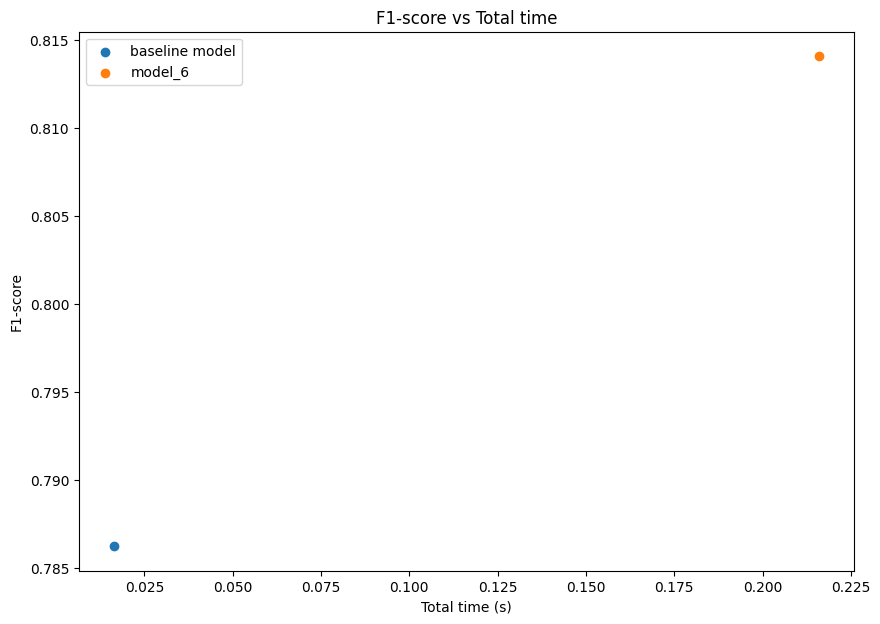

In [ ]:
import matplotlib.pyplot as plt
#plot times vs f1-score
plt.figure(figsize=(10,7))
plt.scatter(basemodel_total_time, baseline_results['f1'], label="baseline model")
plt.scatter(model_6_total_time, result_model_6['f1'], label="model_6")
plt.legend()
plt.xlabel('Total time (s)')
plt.ylabel('F1-score')
plt.title('F1-score vs Total time');